In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML, clear_output

In [2]:
project_root = "/Users/tayebekavousi/Desktop/github_sa"
# Save the original directory to go back to it later if needed
original_dir = os.getcwd()
# Change to the project root directory
os.chdir(project_root)
# Ensure the project root is in the Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
sys.path.insert(0, '')  # Add current directory (empty string) to path


print("Environment setup complete!")

Environment setup complete!


In [3]:
from src.models.deberta.train_deberta import main
from src.config import CONFIG

Starting fine-tuning process...
[INFO] Initializing DeBERTa fine-tuner with model: microsoft/deberta-base
[INFO] Tokenizer loaded successfully.


Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifi

[INFO] Model microsoft/deberta-base initialized with 2 labels.
[INFO] Model moved to device: cpu
[INFO] Data module initialized.
[INFO] Model initialized on device: cpu
[INFO] Optimizer: AdamW with learning rate 2e-05
[INFO] ModelTrainer initialized.

[INFO] Starting DeBERTa fine-tuning process.
[INFO] Loading dataset...
[INFO] Loaded dataset with 3238 samples.
[INFO] Creating dataloaders...
[INFO] Dataloaders created.

[INFO] Starting training...
[INFO] Training started for 3 epochs.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/152 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/31 [00:00<?, ?it/s]


⏱️  Epoch: 1/3
📊 Training   | Loss: 0.4536
📊 Validation | Loss: 0.2245 | Accuracy: 0.9218 | F1 Score: 0.9218

📈 New best model saved!


Training Batches:   0%|          | 0/152 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/31 [00:00<?, ?it/s]


⏱️  Epoch: 2/3
📊 Training   | Loss: 0.2213
📊 Validation | Loss: 0.1828 | Accuracy: 0.9342 | F1 Score: 0.9341

📈 New best model saved!


Training Batches:   0%|          | 0/152 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/31 [00:00<?, ?it/s]


⏱️  Epoch: 3/3
📊 Training   | Loss: 0.1330
📊 Validation | Loss: 0.2234 | Accuracy: 0.9280 | F1 Score: 0.9280

✅ Training complete!


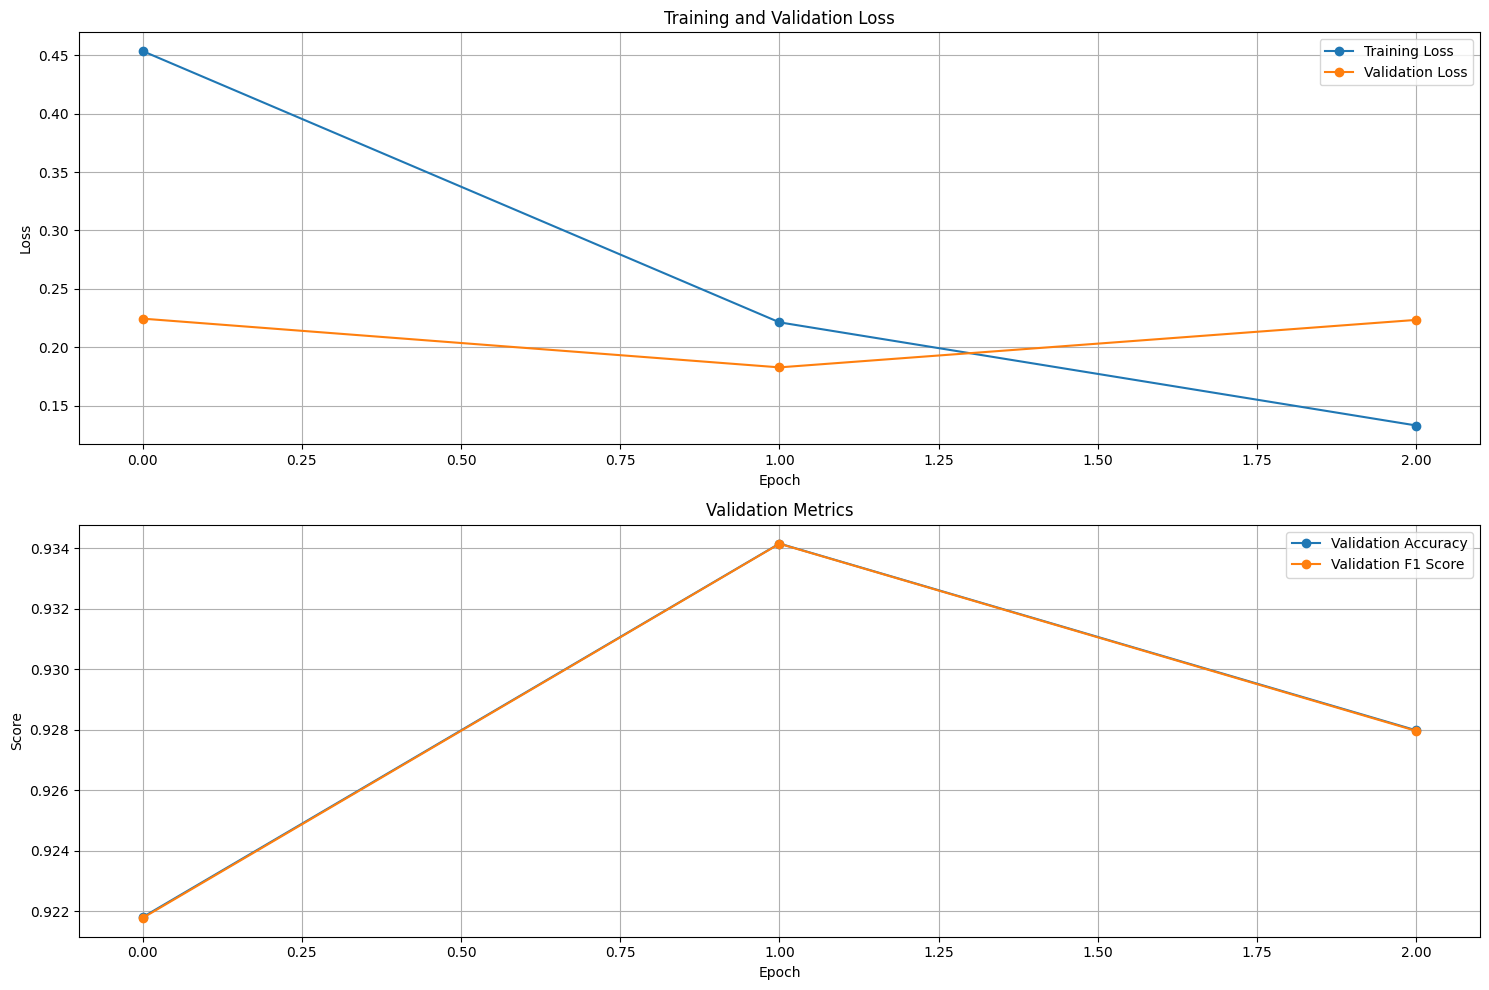

[INFO] Training complete.
[INFO] Evaluating model...
[INFO] Initializing model evaluator...
[INFO] Running evaluation...
[INFO] Evaluating model on 21 batches...
[INFO] Evaluation complete. Processed 324 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.9198
[INFO] Generating evaluation report at evaluation_results/microsoft/deberta-base_evaluation_report_v03.pdf...
[INFO] Evaluation report saved as 'evaluation_results/microsoft/deberta-base_evaluation_report_v03.pdf'
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.9198
[INFO] Evaluation report generated at evaluation_results/microsoft/deberta-base_evaluation_report_v03.pdf
[INFO] Model evaluation metrics: {'accuracy': 0.9197530864197531, 'precision': 0.9197530864197531, 'recall': 0.9197530864197531, 'f1': 0.9197530864197531, 'per_class': {'Negative': {'precision': 0.9197530864197531, 'recall': 0.9197530864197531, 'f1-score': 0.9197530864197531, 'support': 162}, 'Positive

In [4]:
# Run the main function and capture the returned fine_tuner instance
print("Starting fine-tuning process...")
fine_tuner = main()
print("Fine-tuning process completed!")   

Final Evaluation Metrics:


,Metric,Value
0,accuracy,0.919753
1,precision,0.919753
2,recall,0.919753
3,f1,0.919753
4,per_class,"{'Negative': {'precision': 0.9197530864197531,..."
5,confusion_matrix,"[[149, 13], [13, 149]]"
6,roc_auc,0.974966
7,roc_curve,"{'fpr': [0.0, 0.0, 0.0, 0.006172839506172839, ..."
8,average_precision,0.977891
9,pr_curve,"{'precision': [0.5644599303135889, 0.562937062..."


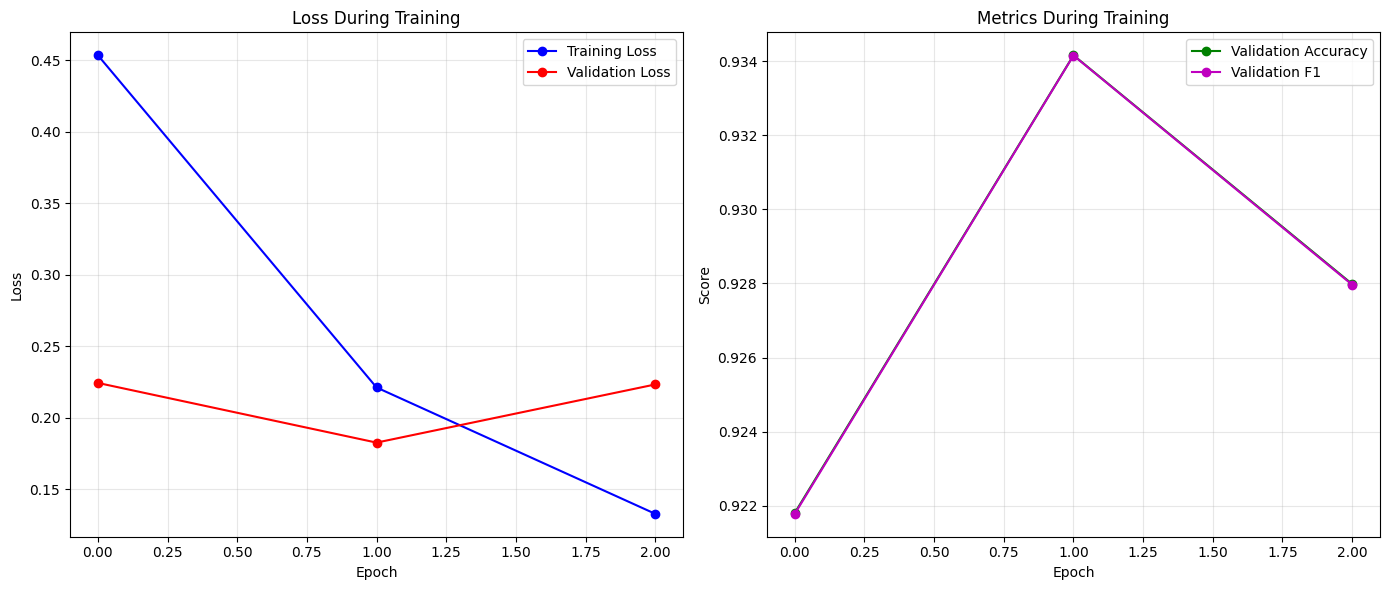

In [5]:
# Cell 4: View Training Results
    
# Display metrics if available
if hasattr(fine_tuner, 'metrics'):
    print("Final Evaluation Metrics:")
    metrics_df = pd.DataFrame([fine_tuner.metrics])
    display(metrics_df.T.reset_index().rename(columns={'index': 'Metric', 0: 'Value'}))
# Visualize training history if available
if hasattr(fine_tuner.trainer, 'history') and fine_tuner.trainer.history:
    history = fine_tuner.trainer.history
    if history.get('train_loss') and history.get('val_loss'):
        # Create figure
        plt.figure(figsize=(14, 6))
        # Plot training and validation loss
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], 'b-o', label='Training Loss')
        plt.plot(history['val_loss'], 'r-o', label='Validation Loss')
        plt.title('Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        # Plot performance metrics
        plt.subplot(1, 2, 2)
        if 'val_accuracy' in history:
            plt.plot(history['val_accuracy'], 'g-o', label='Validation Accuracy')
        if 'val_f1' in history:
            # Fix: Change 'p-o' to 'm-o' (magenta instead of purple)
            plt.plot(history['val_f1'], 'm-o', label='Validation F1')
        plt.title('Metrics During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No training history available.")

Loading test dataset...
Test dataset loaded with 324 samples.
Running comprehensive evaluation...
[INFO] Evaluating model on 21 batches...
[INFO] Evaluation complete. Processed 324 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.9198


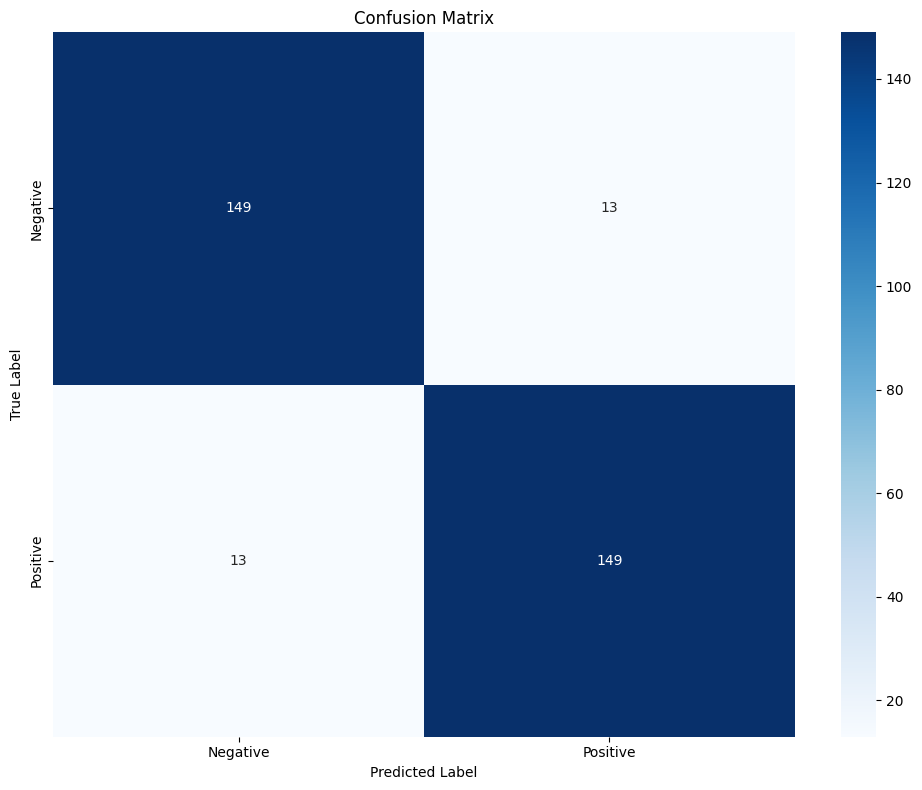


Classification Report:


,Precision,Recall,F1 Score,Accuracy
0,0.919753,0.919753,0.919753,0.919753



Per-Class Performance:


,precision,recall,f1-score,support
Negative,0.919753,0.919753,0.919753,162.0
Positive,0.919753,0.919753,0.919753,162.0


In [6]:
# Cell 5: Run Comprehensive Evaluation
try:
    # Display header
    display(HTML("<div class='section-header'>Model Evaluation</div>"))
    
    # Import evaluator
    from src.training.model_evaluator import ModelEvaluator
    
    # Get test data
    print("Loading test dataset...")
    texts, labels = fine_tuner.data_module.load_dataset()
    _, _, test_loader = fine_tuner.data_module.create_dataloaders(texts, labels)
    print(f"Test dataset loaded with {len(test_loader.dataset)} samples.")
    
    # Create evaluator and run evaluation
    print("Running comprehensive evaluation...")
    evaluator = ModelEvaluator(
        model=fine_tuner.model,
        device=fine_tuner.device,
        model_name="Deverta Sentiment Classifier",
        class_names=fine_tuner.class_names
    )
    
    # Evaluate model (get raw results for custom visualizations)
    all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)
    metrics = evaluator.calculate_metrics(all_labels, all_preds, all_probs)
    
    # Display confusion matrix
    plt.figure(figsize=(10, 8))
    cm = metrics["confusion_matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
               xticklabels=fine_tuner.class_names, 
               yticklabels=fine_tuner.class_names)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()
    
    # Display classification metrics
    print("\nClassification Report:")
    metrics_df = pd.DataFrame({
        'Precision': [metrics['precision']],
        'Recall': [metrics['recall']],
        'F1 Score': [metrics['f1']],
        'Accuracy': [metrics['accuracy']]
    })
    display(metrics_df)
    
    # Display per-class metrics if available
    if 'per_class' in metrics:
        print("\nPer-Class Performance:")
        per_class_df = pd.DataFrame(metrics['per_class']).T
        display(per_class_df)
    
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

In [7]:
# Cell 6: Generate PDF Report
try:
    # Display header
    display(HTML("<div class='section-header'>Generate Evaluation Report</div>"))
    
    # Generate PDF report
    report_path = f"evaluation_results/{CONFIG['models']['deberta']['pretrained_model_name']}_evaluation_report_final_version.pdf"
    os.makedirs(os.path.dirname(report_path), exist_ok=True)
    
    print(f"Generating comprehensive PDF report at {report_path}...")
    evaluator.generate_pdf_report(all_labels, all_preds, all_probs, output_path=report_path)
    print(f"PDF report generated successfully at: {report_path}")
    
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


Generating comprehensive PDF report at evaluation_results/microsoft/deberta-base_v03_evaluation_report_v02.pdf...
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.9198
[INFO] Generating evaluation report at evaluation_results/microsoft/deberta-base_v03_evaluation_report_v02.pdf...
[INFO] Evaluation report saved as 'evaluation_results/microsoft/deberta-base_v03_evaluation_report_v02.pdf'
PDF report generated successfully at: evaluation_results/microsoft/deberta-base_v03_evaluation_report_v02.pdf


In [16]:
import torch

# Cell 7: Test with Custom Inputs (Optional)
try:
    # Display header
    display(HTML("<div class='section-header'>Test with Custom Inputs</div>"))
    
    def predict_sentiment(text):
        """Function to predict sentiment of a given text"""
        # Tokenize input
        inputs = fine_tuner.tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=CONFIG["training"]["max_length"]
        )
        
        # Move inputs to device
        inputs = {key: val.to(fine_tuner.device) for key, val in inputs.items()}
        
        # Set model to evaluation mode
        fine_tuner.model.eval()
        
        # Get prediction
        with torch.no_grad():
            outputs = fine_tuner.model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            prediction = torch.argmax(logits, dim=1)
        
        # Get predicted class
        predicted_class = fine_tuner.class_names[prediction.item()]
        confidence = probabilities[0][prediction.item()].item() * 100
        
        # Get probabilities for all classes
        class_probs = {
            fine_tuner.class_names[i]: prob.item() * 100 
            for i, prob in enumerate(probabilities[0])
        }
        
        return predicted_class, confidence, class_probs
    
    # Create a simple UI for testing
    from ipywidgets import widgets, Layout
    from IPython.display import display, clear_output
    
    # Create text input
    text_input = widgets.Textarea(
        placeholder='Enter text to analyze...',
        layout=Layout(width='100%', height='100px')
    )
    
    # Create button
    button = widgets.Button(
        description='Analyze Sentiment',
        button_style='primary',
        layout=Layout(width='200px')
    )
    
    # Create output area
    output = widgets.Output()
    
    # Define button click event
    def on_button_click(b):
        with output:
            clear_output()
            if not text_input.value.strip():
                print("Please enter some text to analyze.")
                return
            
            print(f"Analyzing: \"{text_input.value}\"")
            predicted_class, confidence, class_probs = predict_sentiment(text_input.value)
            
            print(f"\nPredicted sentiment: {predicted_class} (Confidence: {confidence:.2f}%)")
            print("\nProbabilities for all classes:")
            for cls, prob in class_probs.items():
                print(f"  - {cls}: {prob:.2f}%")
    
    button.on_click(on_button_click)
    
    # Display widgets
    print("Try your own examples:")
    display(text_input)
    display(button)
    display(output)
    
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

Try your own examples:


Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Enter text to analyze...')

Button(button_style='primary', description='Analyze Sentiment', layout=Layout(width='200px'), style=ButtonStyl…

Output()

In [14]:
# import torch
# import os
# import json
# from datetime import datetime
# from src.config import CONFIG

# def save_model(fine_tuner, version="epoch2", base_dir="saved_models"):
#     """
#     Save only the best performing model weights (e.g., from epoch 2) along with the tokenizer 
#     and configuration. This function omits saving the complete model and training history.
    
#     Args:
#         fine_tuner: The fine-tuned model object (assumed to hold the best performing weights).
#         version: Version string to append to the directory name.
#         base_dir: Base directory for saved models.
#     """
#     # Create a directory based on the model type and version.
#     model_type = fine_tuner.model_type if hasattr(fine_tuner, 'model_type') else "deberta"
#     save_dir = os.path.join(base_dir, f"{model_type}_{version}")
#     os.makedirs(save_dir, exist_ok=True)
    
#     # Create a timestamp for file naming.
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
#     # Save only the best performing model weights.
#     weights_path = os.path.join(save_dir, f"best_weights_{timestamp}.pt")
#     torch.save(fine_tuner.model.state_dict(), weights_path)
#     print(f"Best performing model weights saved at: {weights_path}")
    
#     # Save the tokenizer for inference.
#     tokenizer_path = os.path.join(save_dir, "tokenizer")
#     fine_tuner.tokenizer.save_pretrained(tokenizer_path)
#     print(f"Tokenizer saved at: {tokenizer_path}")
    
#     # Save a comprehensive configuration file for reference.
#     config_path = os.path.join(save_dir, f"config_{timestamp}.json")
#     config_data = {
#         "model_name": f"{model_type.capitalize()} Sentiment Classifier",
#         "version": version,
#         "timestamp": timestamp,
#         "class_names": fine_tuner.class_names,
#         "device_trained_on": fine_tuner.device,
#         "pretrained_model": CONFIG["models"][model_type]["pretrained_model_name"],
#         "training_config": {k: v for k, v in CONFIG["training"].items()},
#         "dataset_config": {k: v for k, v in CONFIG["dataset"].items() 
#                            if k not in ["raw_combined_dataset", "raw_toxiCR_dataset"]}
#     }
    
#     with open(config_path, "w") as f:
#         json.dump(config_data, f, indent=4)
#     print(f"Comprehensive configuration saved at: {config_path}")


In [15]:
# save_model(fine_tuner)

Best performing model weights saved at: saved_models/deberta_epoch2/best_weights_20250322_143118.pt
Tokenizer saved at: saved_models/deberta_epoch2/tokenizer
Comprehensive configuration saved at: saved_models/deberta_epoch2/config_20250322_143118.json


In [17]:
import torch
import os
import json
from datetime import datetime
import re
from collections import defaultdict

# Parse training logs to extract epoch metrics
def parse_training_logs(log_content):
    """
    Parse the training logs to extract metrics for each epoch.
    
    Args:
        log_content: String containing the training logs
        
    Returns:
        dict: Dictionary with epoch number as key and metrics as values
    """
    epoch_metrics = {}
    
    # Extract data using regex patterns
    epoch_pattern = r"⏱️\s+Epoch:\s+(\d+)/\d+"
    training_loss_pattern = r"📊\s+Training\s+\|\s+Loss:\s+(\d+\.\d+)"
    validation_metrics_pattern = r"📊\s+Validation\s+\|\s+Loss:\s+(\d+\.\d+)\s+\|\s+Accuracy:\s+(\d+\.\d+)\s+\|\s+F1\s+Score:\s+(\d+\.\d+)"
    
    # Find all occurrences
    epochs = re.findall(epoch_pattern, log_content)
    training_losses = re.findall(training_loss_pattern, log_content)
    validation_metrics = re.findall(validation_metrics_pattern, log_content)
    
    # Combine the data
    for i, epoch in enumerate(epochs):
        epoch_num = int(epoch)
        epoch_metrics[epoch_num] = {
            'train_loss': float(training_losses[i]),
            'val_loss': float(validation_metrics[i][0]),
            'val_accuracy': float(validation_metrics[i][1]),
            'val_f1': float(validation_metrics[i][2])
        }
    
    return epoch_metrics

def find_best_epoch(epoch_metrics, metric='val_f1'):
    """
    Find the epoch with the best performance based on the specified metric.
    
    Args:
        epoch_metrics: Dictionary with epoch metrics
        metric: Metric to use for determining the best epoch
        
    Returns:
        tuple: (best_epoch, best_metric_value)
    """
    best_epoch = None
    best_value = -1
    
    for epoch, metrics in epoch_metrics.items():
        if metrics[metric] > best_value:
            best_value = metrics[metric]
            best_epoch = epoch
    
    return best_epoch, best_value

def save_best_model(fine_tuner, best_epoch, metrics, base_dir="saved_models"):
    """
    Save only the best performing model based on the identified best epoch.
    
    Args:
        fine_tuner: The fine-tuned model object
        best_epoch: The epoch number with best performance
        metrics: Dictionary of metrics for the best epoch
        base_dir: Base directory for saved models
    
    Returns:
        str: Path to the saved model directory
    """
    from src.config import CONFIG  # Import here to avoid errors if running in different context
    
    # Create a directory for the best model
    model_type = fine_tuner.model_type if hasattr(fine_tuner, 'model_type') else "deberta"
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = os.path.join(base_dir, f"{model_type}_best_model_epoch{best_epoch}")
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the model weights
    weights_path = os.path.join(save_dir, f"best_weights_epoch{best_epoch}.pt")
    torch.save(fine_tuner.model.state_dict(), weights_path)
    print(f"Best model weights (epoch {best_epoch}) saved at: {weights_path}")
    
    # Save the tokenizer for inference
    tokenizer_path = os.path.join(save_dir, "tokenizer")
    fine_tuner.tokenizer.save_pretrained(tokenizer_path)
    print(f"Tokenizer saved at: {tokenizer_path}")
    
    # Save configuration
    config_path = os.path.join(save_dir, f"config_{timestamp}.json")
    
    try:
        config_data = {
            "model_name": f"{model_type.capitalize()} Sentiment Classifier",
            "best_epoch": best_epoch,
            "metrics": {k: float(v) for k, v in metrics.items()},
            "timestamp": timestamp,
            "class_names": fine_tuner.class_names if hasattr(fine_tuner, 'class_names') else ["Negative", "Positive"],
            "device_trained_on": str(fine_tuner.device) if hasattr(fine_tuner, 'device') else "cpu",
            "pretrained_model": CONFIG["models"][model_type]["pretrained_model_name"] 
                               if model_type in CONFIG.get("models", {}) else "microsoft/deberta-base",
            "training_config": {k: v for k, v in CONFIG.get("training", {}).items()},
            "dataset_config": {k: v for k, v in CONFIG.get("dataset", {}).items() 
                             if k not in ["raw_combined_dataset", "raw_toxiCR_dataset"]}
        }
    except:
        # Fallback if CONFIG is not available
        config_data = {
            "model_name": f"{model_type.capitalize()} Sentiment Classifier",
            "best_epoch": best_epoch,
            "metrics": {k: float(v) for k, v in metrics.items()},
            "timestamp": timestamp,
            "class_names": fine_tuner.class_names if hasattr(fine_tuner, 'class_names') else ["Negative", "Positive"],
            "device_trained_on": str(fine_tuner.device) if hasattr(fine_tuner, 'device') else "cpu",
            "pretrained_model": "microsoft/deberta-base"
        }
    
    with open(config_path, "w") as f:
        json.dump(config_data, f, indent=4)
    print(f"Configuration saved at: {config_path}")
    
    # Create a simple "best_model_info.txt" file for quick reference
    info_path = os.path.join(save_dir, "best_model_info.txt")
    with open(info_path, "w") as f:
        f.write(f"Best Model Information\n")
        f.write(f"====================\n")
        f.write(f"Epoch: {best_epoch}\n")
        f.write(f"Validation Accuracy: {metrics.get('val_accuracy', 'N/A')}\n")
        f.write(f"Validation F1 Score: {metrics.get('val_f1', 'N/A')}\n")
        f.write(f"Validation Loss: {metrics.get('val_loss', 'N/A')}\n")
        f.write(f"Timestamp: {timestamp}\n")
        f.write(f"Weights file: {os.path.basename(weights_path)}\n")
    
    return save_dir

# Example usage in notebook - execute this with your fine_tuner object
"""
# 1. Get the logs (you can replace this with your actual log content)
with open("training_logs.txt", "r") as f:
    log_content = f.read()

# Or use the logs directly if you have them as a string
log_content = "..."  # Your log content from the training output

# 2. Parse the logs to extract metrics
epoch_metrics = parse_training_logs(log_content)
print("Extracted metrics by epoch:")
for epoch, metrics in epoch_metrics.items():
    print(f"Epoch {epoch}: {metrics}")

# 3. Find the best epoch
best_epoch, best_value = find_best_epoch(epoch_metrics, metric='val_f1')
print(f"Best epoch: {best_epoch} with F1 score: {best_value}")

# 4. Save the best model
save_dir = save_best_model(fine_tuner, best_epoch, epoch_metrics[best_epoch])
print(f"Best model saved at: {save_dir}")
"""

'\n# 1. Get the logs (you can replace this with your actual log content)\nwith open("training_logs.txt", "r") as f:\n    log_content = f.read()\n\n# Or use the logs directly if you have them as a string\nlog_content = "..."  # Your log content from the training output\n\n# 2. Parse the logs to extract metrics\nepoch_metrics = parse_training_logs(log_content)\nprint("Extracted metrics by epoch:")\nfor epoch, metrics in epoch_metrics.items():\n    print(f"Epoch {epoch}: {metrics}")\n\n# 3. Find the best epoch\nbest_epoch, best_value = find_best_epoch(epoch_metrics, metric=\'val_f1\')\nprint(f"Best epoch: {best_epoch} with F1 score: {best_value}")\n\n# 4. Save the best model\nsave_dir = save_best_model(fine_tuner, best_epoch, epoch_metrics[best_epoch])\nprint(f"Best model saved at: {save_dir}")\n'

Extracted metrics by epoch:
Epoch 1:
  train_loss: 0.4536
  val_loss: 0.2245
  val_accuracy: 0.9218
  val_f1: 0.9218

Epoch 2:
  train_loss: 0.2213
  val_loss: 0.1828
  val_accuracy: 0.9342
  val_f1: 0.9341

Epoch 3:
  train_loss: 0.1330
  val_loss: 0.2234
  val_accuracy: 0.9280
  val_f1: 0.9280

Best epoch: 2 with F1 score: 0.9341


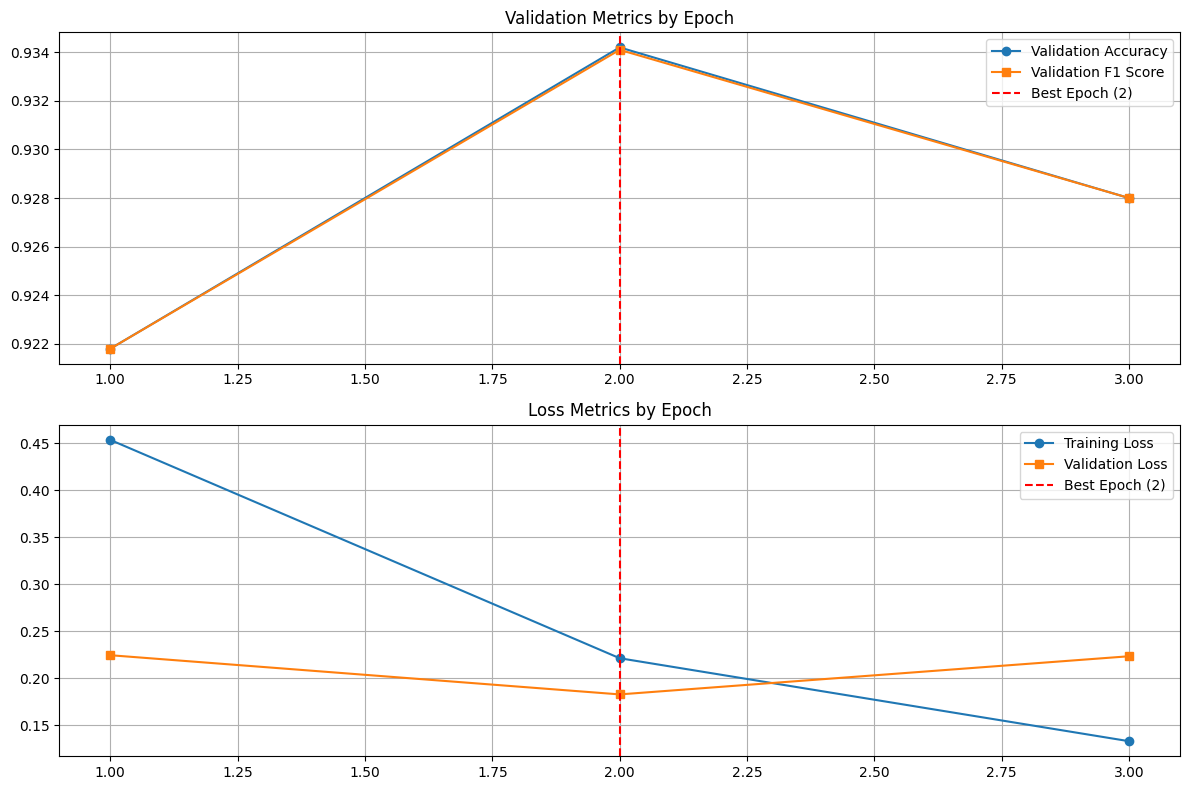

In [18]:
# Copy the functions from the previous cell or import them if saved in a Python file

# Use the log content directly from your pasted logs
log_content = """
================================================================================
⏱️  Epoch: 1/3
================================================================================
📊 Training   | Loss: 0.4536
📊 Validation | Loss: 0.2245 | Accuracy: 0.9218 | F1 Score: 0.9218
================================================================================

📈 New best model saved!

================================================================================
⏱️  Epoch: 2/3
================================================================================
📊 Training   | Loss: 0.2213
📊 Validation | Loss: 0.1828 | Accuracy: 0.9342 | F1 Score: 0.9341
================================================================================

📈 New best model saved!

================================================================================
⏱️  Epoch: 3/3
================================================================================
📊 Training   | Loss: 0.1330
📊 Validation | Loss: 0.2234 | Accuracy: 0.9280 | F1 Score: 0.9280
================================================================================

✅ Training complete!
"""

# Parse the logs to extract metrics
epoch_metrics = parse_training_logs(log_content)
print("Extracted metrics by epoch:")
for epoch, metrics in epoch_metrics.items():
    print(f"Epoch {epoch}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Find the best epoch based on F1 score
best_epoch, best_value = find_best_epoch(epoch_metrics, metric='val_f1')
print(f"Best epoch: {best_epoch} with F1 score: {best_value:.4f}")

# Visualize the metrics
import matplotlib.pyplot as plt

epochs = list(epoch_metrics.keys())
val_acc = [metrics['val_accuracy'] for epoch, metrics in epoch_metrics.items()]
val_f1 = [metrics['val_f1'] for epoch, metrics in epoch_metrics.items()]
val_loss = [metrics['val_loss'] for epoch, metrics in epoch_metrics.items()]
train_loss = [metrics['train_loss'] for epoch, metrics in epoch_metrics.items()]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, val_acc, 'o-', label='Validation Accuracy')
plt.plot(epochs, val_f1, 's-', label='Validation F1 Score')
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.title('Validation Metrics by Epoch')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 's-', label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.title('Loss Metrics by Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [19]:
# Now you can save the best model (Uncomment when ready to save)
save_dir = save_best_model(fine_tuner, best_epoch, epoch_metrics[best_epoch])
print(f"Best model saved at: {save_dir}")

Best model weights (epoch 2) saved at: saved_models/deberta_best_model_epoch2/best_weights_epoch2.pt
Tokenizer saved at: saved_models/deberta_best_model_epoch2/tokenizer
Configuration saved at: saved_models/deberta_best_model_epoch2/config_20250322_150352.json
Best model saved at: saved_models/deberta_best_model_epoch2

To save the best model, uncomment the last two lines and run this cell again.
Make sure your fine_tuner object is available in the notebook.
